       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB
None
             year           pop      lifeExp      gdpPercap
count  1704.00000  1.704000e+03  1704.000000    1704.000000
me

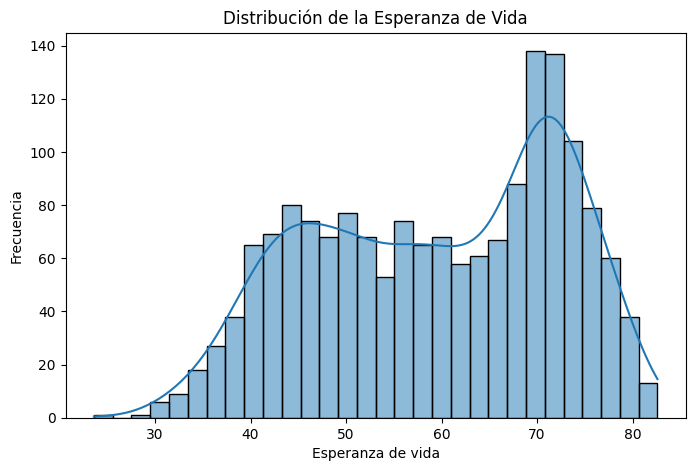

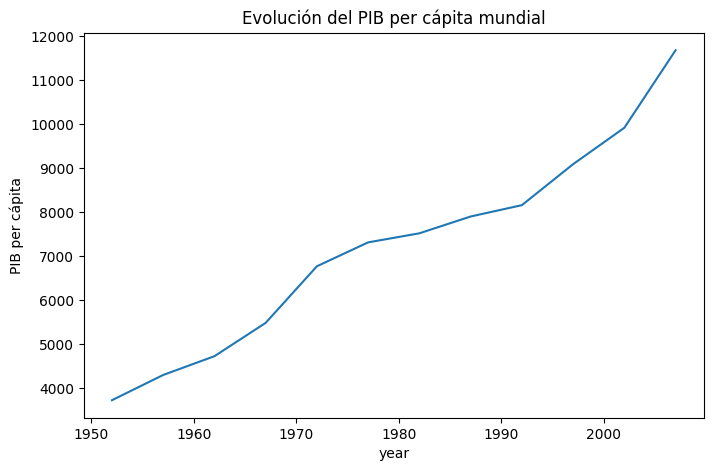

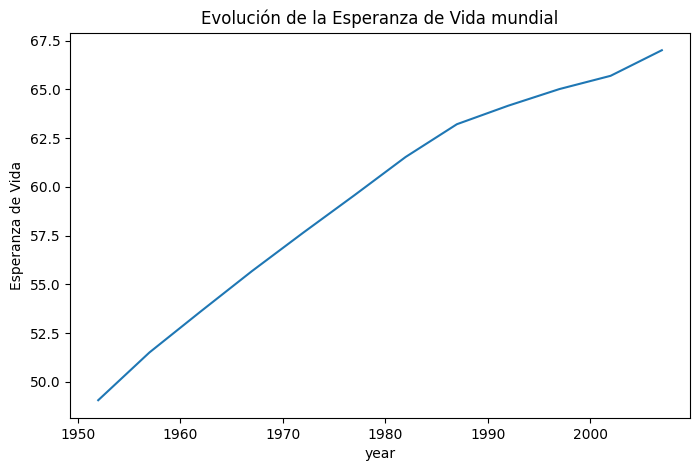

      country      year       pop   lifeExp  gdpPercap  continent_Africa  \
0           0 -1.000000  0.083479 -1.409052  -0.338824                 0   
1           0 -0.818182  0.132051 -1.341450  -0.333726                 0   
2           0 -0.636364  0.193162 -1.267932  -0.329757                 0   
3           0 -0.454545  0.268848 -1.178607  -0.331838                 0   
4           0 -0.272727  0.360649 -1.087294  -0.343682                 0   
...       ...       ...       ...       ...        ...               ...   
1699      141  0.272727  0.130591  0.072348  -0.347846                 1   
1700      141  0.454545  0.219202 -0.014814  -0.349413                 1   
1701      141  0.636364  0.260926 -0.613909  -0.337223                 1   
1702      141  0.818182  0.291990 -0.915046  -0.352046                 1   
1703      141  1.000000  0.314893 -0.760592  -0.376953                 1   

      continent_Americas  continent_Asia  continent_Europe  continent_Oceania  
0      

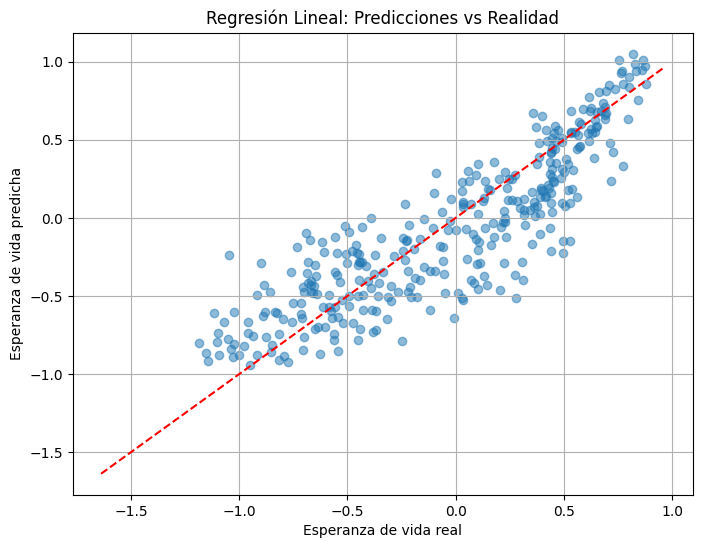

In [6]:
"""
CARGA Y EXPLORACIÓN DE DATOS
"""


import pandas as pd

# Cargar el dataset
df = pd.read_csv('/content/gapminder-FiveYearData.csv')

# Primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe())

"""
VISUALIZACIÓN DE DATOS CON MATPLOTLIB/SEABORN
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de esperanza de vida
plt.figure(figsize=(8, 5))
sns.histplot(df['lifeExp'], bins=30, kde=True)
plt.title('Distribución de la Esperanza de Vida')
plt.xlabel('Esperanza de vida')
plt.ylabel('Frecuencia')
plt.show()

"""
EVOLUCION A LO LARGO DEL TIEMPO
"""

# Agrupado por año (promedios globales)
df_grouped = df.groupby('year')[['lifeExp', 'gdpPercap', 'pop']].mean().reset_index()

# Evolución del PIB per cápita
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_grouped, x='year', y='gdpPercap')
plt.title('Evolución del PIB per cápita mundial')
plt.ylabel('PIB per cápita')
plt.show()

# Evolución de la esperanza de vida
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_grouped, x='year', y='lifeExp')
plt.title('Evolución de la Esperanza de Vida mundial')
plt.ylabel('Esperanza de Vida')
plt.show()

"""
PREPARACION DE LOS DATOS PARA PREDICCION
"""
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from scipy.stats import shapiro
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.read_csv("/content/gapminder-FiveYearData.csv")
# Label encode 'country'

# Label encode 'country'
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

# One-hot encode 'continent' with 0/1 output
continent_ohe = pd.get_dummies(df['continent'], prefix='continent').astype(int)
df = pd.concat([df.drop(columns=['continent']), continent_ohe], axis=1)

# Determine and apply the appropriate scaler for numeric columns
scalers = {}
num_cols = ['year', 'pop', 'lifeExp', 'gdpPercap']

for col in num_cols:
    stat, p = shapiro(df[col])
    if p > 0.05:
        scalers[col] = StandardScaler()
    else:
        scalers[col] = RobustScaler()

# Apply scalers
for col, scaler in scalers.items():
    df[[col]] = scaler.fit_transform(df[[col]])

print(df)


"""
PREDICCIÓN ESPERANZA DE VIDA

Aplicamos un modelo de regresión lineal para predecir la esperanza de vida (`lifeExp`) utilizando como variables predictoras el año, país, población, PIB per cápita y el continente.

"""

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Variables predictoras y variable objetivo
X = df.drop(columns=['lifeExp'])
y = df['lifeExp']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² score: {r2:.4f}")

"""
Visualización del rendimiento del modelo de regresión lineal en el conjunto de prueba.

Comparamos los valores reales de esperanza de vida con las predicciones del modelo de regresión lineal para evaluar visualmente su precisión.

"""
import matplotlib.pyplot as plt

# Gráfico: valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Esperanza de vida real")
plt.ylabel("Esperanza de vida predicha")
plt.title("Regresión Lineal: Predicciones vs Realidad")
plt.grid(True)
plt.show()




